HW1 - standard-identification-deeplearning

Sub-Homework 1 – Bayesian Classifier with Cost-Sensitive Decision Making

In this assignment, we implemented a simple 1D Bayesian classifier to distinguish between two classes (ω1 and ω2) using samples drawn from Gaussian distributions.

Each class is defined by a mean and a standard deviation:
- ω1: mean = 2, std = 0.5
- ω2: mean = 1.8, std = 0.2

The script:
- Generates random samples for each class based on the above distributions
- Uses a-priori probabilities: P(ω1) = 1/4, P(ω2) = 3/4
- Applies a custom cost matrix to define penalties for misclassification
- Computes posterior probabilities using Bayes’ theorem
- Calculates expected costs for assigning each class to a sample
- Assigns each sample to the class with the lower expected cost
- Prints the assigned class per sample and the final total classification cost

This assignment highlights how probabilistic decision theory and cost functions influence classification outcomes in practical systems.



In [2]:
import numpy as np

# Configuration
NUM_SAMPLES = 1000

# Class ω1 parameters
mean_w1 = 2.0
std_w1 = 0.5

# Class ω2 parameters
mean_w2 = 1.8
std_w2 = 0.2

# Priors
prior_w1 = 1 / 4
prior_w2 = 3 / 4

# Cost matrix
# [ [C(w1|w1), C(w2|w1)],
#   [C(w1|w2), C(w2|w2)] ]
cost_matrix = np.array([[0, 1],
                        [3, 0]])

def gaussian_pdf(x, mean, std):
    """Returns the value of the Gaussian PDF at x."""
    coef = 1 / (std * np.sqrt(2 * np.pi))
    exp_part = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
    return coef * exp_part

def compute_posteriors(x):
    """Computes posterior probabilities using Bayes' rule."""
    p_x_w1 = gaussian_pdf(x, mean_w1, std_w1)
    p_x_w2 = gaussian_pdf(x, mean_w2, std_w2)

    numerator_w1 = p_x_w1 * prior_w1
    numerator_w2 = p_x_w2 * prior_w2
    total = numerator_w1 + numerator_w2

    return numerator_w1 / total, numerator_w2 / total

def expected_costs(post_w1, post_w2):
    """Computes expected cost of classifying as ω1 or ω2."""
    cost_w1 = cost_matrix[0, 0] * post_w1 + cost_matrix[0, 1] * post_w2
    cost_w2 = cost_matrix[1, 0] * post_w1 + cost_matrix[1, 1] * post_w2
    return cost_w1, cost_w2

def classify_sample(x):
    """Classifies sample x and returns assigned class and cost."""
    post_w1, post_w2 = compute_posteriors(x)
    cost_w1, cost_w2 = expected_costs(post_w1, post_w2)
    if cost_w1 < cost_w2:
        return "ω1", cost_w1
    else:
        return "ω2", cost_w2

def main():
    # Generate samples from ω1 (only testing samples from class ω1 here)
    samples = np.random.normal(mean_w1, std_w1, NUM_SAMPLES)
    total_cost = 0

    for i, x in enumerate(samples):
        assigned_class, cost = classify_sample(x)
        total_cost += cost
        print(f"Sample {i + 1:4}: x = {x:.3f}, Assigned Class = {assigned_class}, Cost = {cost:.4f}")

    print("\n--- Summary ---")
    print(f"Total Samples: {NUM_SAMPLES}")
    print(f"Estimated Total Cost: {total_cost:.4f}")
    print(f"Average Cost per Sample: {total_cost / NUM_SAMPLES:.4f}")

if __name__ == "__main__":
    main()


Sample    1: x = 2.517, Assigned Class = ω1, Cost = 0.0204
Sample    2: x = 1.914, Assigned Class = ω2, Cost = 0.4015
Sample    3: x = 1.694, Assigned Class = ω2, Cost = 0.3387
Sample    4: x = 1.388, Assigned Class = ω1, Cost = 0.6545
Sample    5: x = 1.889, Assigned Class = ω2, Cost = 0.3769
Sample    6: x = 2.201, Assigned Class = ω1, Cost = 0.5210
Sample    7: x = 1.361, Assigned Class = ω1, Cost = 0.6042
Sample    8: x = 2.013, Assigned Class = ω2, Cost = 0.5720
Sample    9: x = 1.591, Assigned Class = ω2, Cost = 0.4242
Sample   10: x = 1.653, Assigned Class = ω2, Cost = 0.3624
Sample   11: x = 1.611, Assigned Class = ω2, Cost = 0.4005
Sample   12: x = 1.557, Assigned Class = ω2, Cost = 0.4749
Sample   13: x = 2.069, Assigned Class = ω2, Cost = 0.7373
Sample   14: x = 1.841, Assigned Class = ω2, Cost = 0.3440
Sample   15: x = 2.684, Assigned Class = ω1, Cost = 0.0011
Sample   16: x = 1.990, Assigned Class = ω2, Cost = 0.5198
Sample   17: x = 2.142, Assigned Class = ω1, Cost = 0.64

Sub-Homework 2a – Discriminant Function and Distance Metrics

This task focuses on implementing and comparing three core functions used in classification and pattern recognition.

1. Discriminant Function – `diff(x, average_w, dispersion_w, prior_w)`
   - Computes the value of a discriminant function for input x.
   - Based on the Gaussian distribution with given mean, covariance (dispersion), and prior probability.
   - Returns a score that can be used to compare how likely x belongs to a class.

2. Euclidean Distance – `euclidean(x1, x2)`
   - Computes the standard Euclidean distance between two vectors.
   - Useful for measuring raw geometric similarity.

3. Mahalanobis Distance – `mahalanobis_distance(x, average_w, dispersion_w)`
   - Computes the Mahalanobis distance of point x from a distribution.
   - Takes into account the covariance structure of the data.
   - Used to detect outliers and for more accurate class comparison in Gaussian models.

These functions lay the foundation for more complex classification strategies that account for probabilistic and geometric properties of the data.


In [3]:
import numpy as np

def diff(x, average_w, dispersion_w, prior_w):
    """
    Computes the discriminant function value for a multivariate Gaussian distribution.

    Parameters:
        x           : input feature vector (numpy array)
        average_w   : mean vector of class w
        dispersion_w: covariance matrix of class w
        prior_w     : prior probability of class w

    Returns:
        Discriminant function value (float)
    """
    d = len(x)  # dimensionality
    x = np.array(x)
    average_w = np.array(average_w)
    dispersion_w = np.array(dispersion_w)

    diff = x - average_w
    inv_disp = np.linalg.inv(dispersion_w)
    log_det = np.log(np.linalg.det(dispersion_w))

    result = -0.5 * np.dot(np.dot(diff, inv_disp), diff)
    result -= 0.5 * log_det
    result += np.log(prior_w)
    result -= 0.5 * d * np.log(2 * np.pi)

    return result

def euclidean(x1, x2):
    """
    Computes the Euclidean distance between two vectors.

    Parameters:
        x1, x2 : numpy arrays representing vectors

    Returns:
        Euclidean distance (float)
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))

def mahalanobis_distance(x, average_w, dispersion_w):
    """
    Computes the Mahalanobis distance from x to the distribution defined by average_w and dispersion_w.

    Parameters:
        x           : input vector
        average_w   : mean vector of class w
        dispersion_w: covariance matrix of class w

    Returns:
        Mahalanobis distance (float)
    """
    x = np.array(x)
    average_w = np.array(average_w)
    dispersion_w = np.array(dispersion_w)

    diff = x - average_w
    inv_disp = np.linalg.inv(dispersion_w)

    return np.sqrt(np.dot(np.dot(diff, inv_disp), diff))

# ========== Example usage ==========
if __name__ == "__main__":
    # Example vectors and covariance matrix
    x = np.array([2.5, 3.0])
    mean_w = np.array([2.0, 3.5])
    cov_w = np.array([[1.0, 0.2],
                      [0.2, 0.5]])
    prior = 0.6

    print("Discriminant value:", diff(x, mean_w, cov_w, prior))
    print("Euclidean distance:", euclidean(x, mean_w))
    print("Mahalanobis distance:", mahalanobis_distance(x, mean_w, cov_w))


Discriminant value: -2.476742643251925
Euclidean distance: 0.7071067811865476
Mahalanobis distance: 1.0161735558713256


Sub-Homework 2b – Synthetic Dataset Generation for Classification

In this subtask, we generate a synthetic dataset consisting of 3 distinct classes (ω₁, ω₂, ω₃), each represented by 3 continuous features: x₁, x₂, x₃.

Each class is modeled using a multivariate Gaussian distribution with a predefined mean vector and covariance matrix.

For each class:
- 100 samples are generated
- Features follow a normal distribution N(μ, Σ)
- Labels are stored in the column 'ω_i'

The generated dataset is saved as a CSV file (`synthetic_dataset.csv`) and structured as follows:
- Columns: x1, x2, x3, ω_i
- Total rows: 300 (100 per class)

This dataset will be reused in later experiments, including:
- Feature-based statistical analysis
- Classification using distance functions (e.g., Mahalanobis, Euclidean)
- Discriminant analysis and decision boundaries


In [5]:
import numpy as np
import pandas as pd

# Parameters
num_samples_per_class = 100

# Class means (center of Gaussian blob)
means = {
    1: [2, 3, 1],
    2: [5, 1, 2],
    3: [1, 5, 4]
}

# Class covariances (can be the same for simplicity or different)
covariances = {
    1: [[1.0, 0.2, 0.1],
        [0.2, 1.0, 0.3],
        [0.1, 0.3, 1.0]],

    2: [[1.2, 0.1, 0.0],
        [0.1, 1.1, 0.2],
        [0.0, 0.2, 1.3]],

    3: [[0.9, 0.3, 0.1],
        [0.3, 0.8, 0.4],
        [0.1, 0.4, 0.9]]
}

# Generate data
all_data = []

for class_label in [1, 2, 3]:
    samples = np.random.multivariate_normal(
        mean=means[class_label],
        cov=covariances[class_label],
        size=num_samples_per_class
    )

    df = pd.DataFrame(samples, columns=['x1', 'x2', 'x3'])
    df['ω_i'] = class_label
    all_data.append(df)

# Combine all classes
data = pd.concat(all_data, ignore_index=True)

# Save to CSV
data.to_csv("synthetic_dataset.csv", index=False)

print("Synthetic dataset saved as synthetic_dataset.csv")


Synthetic dataset saved as synthetic_dataset.csv


Sub-Homework 2b

(I) – Estimation of Mean and Covariance Matrices

This task focuses on estimating the parameters of multivariate Gaussian distributions from a dataset generated in Sub-Homework 2b.

Steps:
1. Load the dataset from the CSV file using pandas.
2. Split the data into 3 subsets, one for each class (ω₁, ω₂, ω₃).
3. Define three feature sets:
   - x1          : using only the first feature
   - x1_x2       : using the first two features
   - all_features: using all three features

4. For each feature set and each class:
   - Compute the mean vector of the selected features
   - Compute the covariance matrix of the selected features

These statistical estimates are printed out and will be used in subsequent classification and analysis tasks.


In [6]:
import pandas as pd

# Load the synthetic dataset
data = pd.read_csv("synthetic_dataset.csv")

# Separate data by class label ω_i
class1_data = data[data['ω_i'] == 1]
class2_data = data[data['ω_i'] == 2]
class3_data = data[data['ω_i'] == 3]

# Define feature combinations
feature_sets = {
    'x1': ['x1'],
    'x1_x2': ['x1', 'x2'],
    'all_features': ['x1', 'x2', 'x3']
}

# Iterate over each feature set and class
for feature_set, feature_columns in feature_sets.items():
    print(f"--- Estimation for feature set: {feature_set} ---")

    for i, class_data in enumerate([class1_data, class2_data, class3_data], start=1):
        class_mean = class_data[feature_columns].mean().to_numpy()
        class_covariance = class_data[feature_columns].cov().to_numpy()

        print(f"Class ω{i} - Mean Vector:")
        print(class_mean)

        print(f"Class ω{i} - Covariance Matrix:")
        print(class_covariance)
        print()

    print("="*50 + "\n")


--- Estimation for feature set: x1 ---
Class ω1 - Mean Vector:
[1.99838464]
Class ω1 - Covariance Matrix:
[[0.78918468]]

Class ω2 - Mean Vector:
[4.92857619]
Class ω2 - Covariance Matrix:
[[1.34832889]]

Class ω3 - Mean Vector:
[1.04482771]
Class ω3 - Covariance Matrix:
[[1.04565392]]


--- Estimation for feature set: x1_x2 ---
Class ω1 - Mean Vector:
[1.99838464 3.30087075]
Class ω1 - Covariance Matrix:
[[0.78918468 0.16763702]
 [0.16763702 1.09967217]]

Class ω2 - Mean Vector:
[4.92857619 1.02204563]
Class ω2 - Covariance Matrix:
[[1.34832889 0.06082802]
 [0.06082802 1.13014722]]

Class ω3 - Mean Vector:
[1.04482771 4.93383576]
Class ω3 - Covariance Matrix:
[[1.04565392 0.45242275]
 [0.45242275 0.81148554]]


--- Estimation for feature set: all_features ---
Class ω1 - Mean Vector:
[1.99838464 3.30087075 1.21314778]
Class ω1 - Covariance Matrix:
[[0.78918468 0.16763702 0.17663997]
 [0.16763702 1.09967217 0.44241032]
 [0.17663997 0.44241032 0.98787195]]

Class ω2 - Mean Vector:
[4.928

Sub-Homework 2b

(II) – Mahalanobis Classifier and Misclassification Estimation

In this subtask, we implement a Bayes-like classifier based on Mahalanobis distance, using only the class-conditional mean vectors and covariance matrices (no priors or cost matrix).

Classifier Rationale:
We selected the Mahalanobis distance instead of Euclidean or discriminant-based approaches because:
- It accounts for the covariance structure of each class
- It is scale-invariant and more robust to correlated features
- Unlike the discriminant function, it does not require prior probabilities, which are not favorable in this task

Procedure:
1. Estimate class-wise means and covariance matrices using the synthetic dataset.
2. For each of the 3 feature subsets:
   - ['x1']
   - ['x1', 'x2']
   - ['x1', 'x2', 'x3']
3. For every data point, compute Mahalanobis distance to each class and assign the point to the class with the minimum distance.
4. Count the number of misclassified samples and calculate the misclassification percentage.

Observations:
- x1 alone yields high error — it lacks strong discriminative power.
- x1 and x2 show improvement but not ideal.
- All three features together result in the lowest error rate, confirming the benefit of using all available dimensions.

This subtask demonstrates how the dimensionality of feature space affects classification accuracy and highlights the effectiveness of Mahalanobis distance in multi-class Gaussian classification problems.


In [9]:
import pandas as pd
import numpy as np

def mahalanobis_distance(x, average_w, dispersion_w):
    """
    Computes Mahalanobis distance from x to a class defined by average_w and dispersion_w.
    """
    x = np.array(x)
    average_w = np.array(average_w)
    dispersion_w = np.array(dispersion_w)

    diff = x - average_w
    inv_disp = np.linalg.inv(dispersion_w)

    return np.sqrt(np.dot(np.dot(diff, inv_disp), diff))

# Load dataset
data = pd.read_csv("synthetic_dataset.csv")

# Separate data per class
class1_data = data[data['ω_i'] == 1]
class2_data = data[data['ω_i'] == 2]
class3_data = data[data['ω_i'] == 3]

# Feature sets to test
feature_sets = {
    'x1': ['x1'],
    'x1_x2': ['x1', 'x2'],
    'all_features': ['x1', 'x2', 'x3']
}

# Classification per feature set
for feature_set, feature_columns in feature_sets.items():
    print(f"\n--- Classification using features: {feature_set} ---")

    # Estimate class means and covariances
    class1_mean = class1_data[feature_columns].mean().to_numpy()
    class1_cov = class1_data[feature_columns].cov().to_numpy()

    class2_mean = class2_data[feature_columns].mean().to_numpy()
    class2_cov = class2_data[feature_columns].cov().to_numpy()

    class3_mean = class3_data[feature_columns].mean().to_numpy()
    class3_cov = class3_data[feature_columns].cov().to_numpy()

    # Count misclassifications
    misclassified = 0

    for _, row in data.iterrows():
        x = np.array(row[feature_columns])
        true_class = int(row['ω_i'])

        # Compute Mahalanobis distances
        d1 = mahalanobis_distance(x, class1_mean, class1_cov)
        d2 = mahalanobis_distance(x, class2_mean, class2_cov)
        d3 = mahalanobis_distance(x, class3_mean, class3_cov)

        # Assign class with minimum distance
        assigned_class = np.argmin([d1, d2, d3]) + 1

        if assigned_class != true_class:
            misclassified += 1

    total_points = len(data)
    error_rate = (misclassified / total_points) * 100

    print(f"Misclassification Rate: {error_rate:.2f}%")



--- Classification using features: x1 ---
Misclassification Rate: 25.33%

--- Classification using features: x1_x2 ---
Misclassification Rate: 9.67%

--- Classification using features: all_features ---
Misclassification Rate: 2.67%


Sub-Homework 3 – Beta Distribution Analysis and Visualization

In this task, we study the shape and behavior of Beta distributions by varying the shape parameter D and visualizing the resulting probability density functions (PDFs).

Part 1 – PDF Plotting:
- We fix the normalizing constant A = 30
- We compute and plot the following PDFs using the expression: A * x * (1 - x)^k
  - D^1:  (1 - x)^5
  - D^5:  (1 - x)^9
  - D^10: (1 - x)^14
- The domain is x ∈ [0, 1] with 10 uniformly spaced values
- The resulting curves demonstrate how increasing D sharpens the Beta distribution near 0

Part 2 – Symbolic Beta Function:
- We symbolically compute the Beta function B(10, 30) using SymPy
- This is done by evaluating the integral:
    ∫₀¹ θ⁹ * (1 - θ)²⁹ dθ
- The result is printed exactly (as a rational number or symbolic expression)

This subhomework demonstrates how Beta distributions behave as shape parameters vary and how symbolic computation can be used to evaluate special functions analytically.


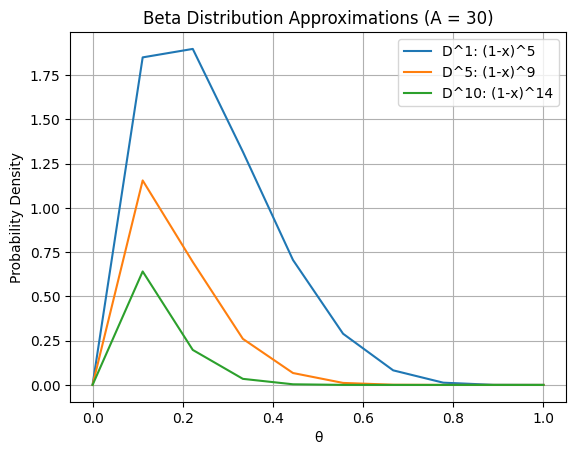

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Domain of theta
x_values = np.linspace(0, 1, 10)

# Normalization constant (manually chosen)
A = 30

# Calculate PDFs for different D exponents
pdf_d1 = [A * x * (1 - x)**5 for x in x_values]
pdf_d5 = [A * x * (1 - x)**9 for x in x_values]
pdf_d10 = [A * x * (1 - x)**14 for x in x_values]

# Plotting
plt.plot(x_values, pdf_d1, label='D^1: (1-x)^5')
plt.plot(x_values, pdf_d5, label='D^5: (1-x)^9')
plt.plot(x_values, pdf_d10, label='D^10: (1-x)^14')

plt.xlabel("θ")
plt.ylabel("Probability Density")
plt.title("Beta Distribution Approximations (A = 30)")
plt.legend()
plt.grid(True)
plt.show()
